<a href="https://colab.research.google.com/github/luan640/KNN---K-Nearest-Neighbors/blob/main/KNN_K_Nearest_Neighbors_D%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN - N Nearest Neighbors

### Carregando a base de dados - Dígitos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

### Descrição sobre a base de dados

In [ ]:
print(digits.DESCR)

### Visualizando os valores de dados

In [5]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualizando os valores de classes

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando as imagens e classes

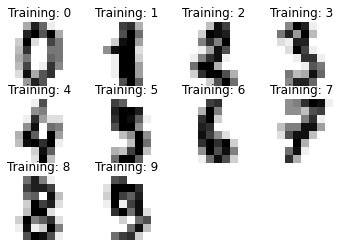

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Convertendo os dados em Dataframe

In [8]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [9]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

### Cada coluna corresponde a cor do pixel do númeral e a coluna "classe" é o target.

In [10]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Dividindo os dados em treino e teste

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

### Verificando a forma dos dados

In [13]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [14]:
y_train.shape,y_test.shape

((1257,), (540,))

### Instânciando o algoritmo KNN
#### n_neighbors = valor de k, normalmente é feito uma análise para encontrar um melhor valor para esse parâmetro. Mais na frente será feito essa análise. Porntando para esse passo o valor n_neighbors=3 foi apenas para seguir com o modelo.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Predizendo novos pontos 

In [18]:
resultado = knn.predict(X_test)
resultado

array([5, 6, 9, 1, 0, 5, 6, 9, 1, 7, 3, 1, 3, 0, 3, 8, 1, 1, 2, 3, 9, 9,
       2, 5, 1, 7, 6, 9, 3, 8, 3, 0, 1, 7, 2, 2, 0, 1, 0, 7, 8, 1, 7, 9,
       6, 5, 4, 3, 8, 2, 3, 9, 4, 9, 5, 9, 5, 2, 7, 9, 4, 4, 8, 9, 7, 0,
       8, 8, 7, 7, 1, 6, 0, 4, 5, 5, 0, 9, 7, 0, 1, 2, 4, 3, 9, 9, 1, 5,
       2, 2, 5, 3, 5, 4, 6, 5, 2, 7, 2, 3, 2, 7, 0, 2, 9, 3, 1, 0, 5, 1,
       9, 5, 3, 5, 1, 1, 1, 5, 8, 1, 2, 1, 5, 2, 0, 5, 5, 7, 6, 4, 2, 4,
       1, 3, 8, 5, 4, 9, 5, 5, 1, 4, 6, 0, 8, 2, 5, 5, 5, 9, 8, 3, 6, 9,
       1, 2, 9, 3, 5, 6, 0, 1, 2, 3, 9, 3, 0, 7, 3, 9, 2, 1, 1, 7, 7, 3,
       6, 8, 5, 8, 6, 3, 4, 6, 8, 3, 4, 0, 3, 1, 2, 6, 6, 3, 6, 7, 9, 0,
       6, 1, 0, 2, 3, 9, 0, 8, 3, 0, 3, 7, 7, 2, 5, 6, 6, 1, 3, 2, 5, 9,
       6, 8, 9, 8, 8, 7, 4, 0, 5, 4, 1, 3, 5, 0, 1, 0, 9, 5, 1, 1, 2, 4,
       4, 2, 4, 1, 9, 4, 2, 3, 6, 3, 6, 5, 2, 3, 8, 3, 4, 8, 4, 7, 7, 7,
       5, 6, 2, 6, 6, 7, 1, 7, 6, 9, 2, 2, 4, 3, 2, 7, 4, 1, 8, 6, 0, 5,
       2, 1, 6, 0, 8, 1, 4, 3, 4, 7, 6, 4, 3, 4, 5,

## Técnicas de Validação

### Metricas de classificação
#### Percentual de precisão dos acertos.

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      1.00      0.98        57
           2       0.98      1.00      0.99        52
           3       0.95      0.98      0.97        62
           4       1.00      0.98      0.99        52
           5       0.98      0.98      0.98        57
           6       1.00      1.00      1.00        49
           7       0.98      1.00      0.99        50
           8       0.98      0.93      0.96        59
           9       0.96      0.92      0.94        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### Matriz de Confusão
#### Para demostrar a confusão entre as classes do target. Por exemplo: O target 0 não foi confundido com nenhuma outra classe. Ja o target 3 foi confundido com o target 7, apenas 1 vez. Assim sucessivamente.

In [20]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  50   0   0   0   0   0   0   0   0   0   50
1                   0  57   0   0   0   0   0   0   0   0   57
2                   0   0  52   0   0   0   0   0   0   0   52
3                   0   0   0  61   0   0   0   1   0   0   62
4                   0   0   0   0  51   0   0   0   0   1   52
5                   0   0   0   0   0  56   0   0   0   1   57
6                   0   0   0   0   0   0  49   0   0   0   49
7                   0   0   0   0   0   0   0  50   0   0   50
8                   0   2   1   1   0   0   0   0  55   0   59
9                   0   0   0   2   0   1   0   0   1  48   52
All                50  59  53  64  51  57  49  51  56  50  540


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe',axis=1),dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

## Otimizando o Parametro K

### Importando o GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parametro 

In [22]:
#criando uma lista de 1 a 31
k_list = list(range(1,31))

In [23]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciando o objeto GridSearch

In [24]:
#especificar o tipo de algoritimo, n_neighbors, cv e o tipo de scoring que queremos ver. Normalmente o cv é usado como 5.
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Treinando o objeto

In [25]:
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Visualizando os valores de scores e rankeando qual o melhor

In [40]:
grid.cv_results_
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9671711544413494 de acurácia


### Visualização dos valores de K e acurácia

In [53]:
grid.cv_results_['mean_test_score']

array([0.96439338, 0.96717115, 0.96662179, 0.96384092, 0.96272826,
       0.95938564, 0.95994584, 0.95827608, 0.95661096, 0.95494274,
       0.9554983 , 0.95660786, 0.95549675, 0.95605076, 0.9549381 ,
       0.95438409, 0.95326679, 0.94937481, 0.95048437, 0.94992881,
       0.94881925, 0.94937635, 0.94770814, 0.94882389, 0.94548128,
       0.94548282, 0.94380997, 0.94324977, 0.94102755, 0.94102445])

### Curva com os valores de k que melhor se adequa ao modelo. No caso o valor de k é 2.

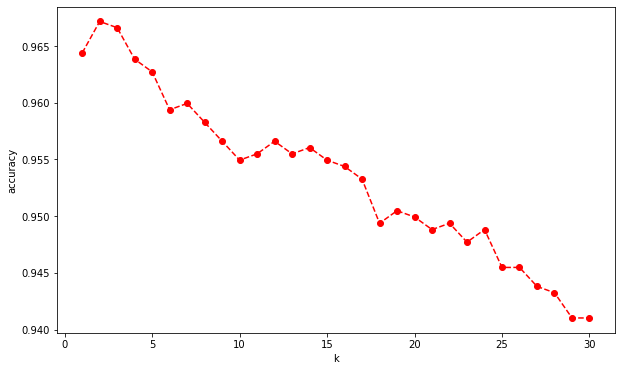

In [56]:
scores=[]
for score in grid.cv_results_['mean_test_score']:
    scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()